In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
temp = pd.read_csv('temp.csv')

In [36]:
temp.drop('Unnamed: 0', axis=1, inplace=True)

In [37]:
temp.rename(columns={'date': 'Date'}, inplace=True)

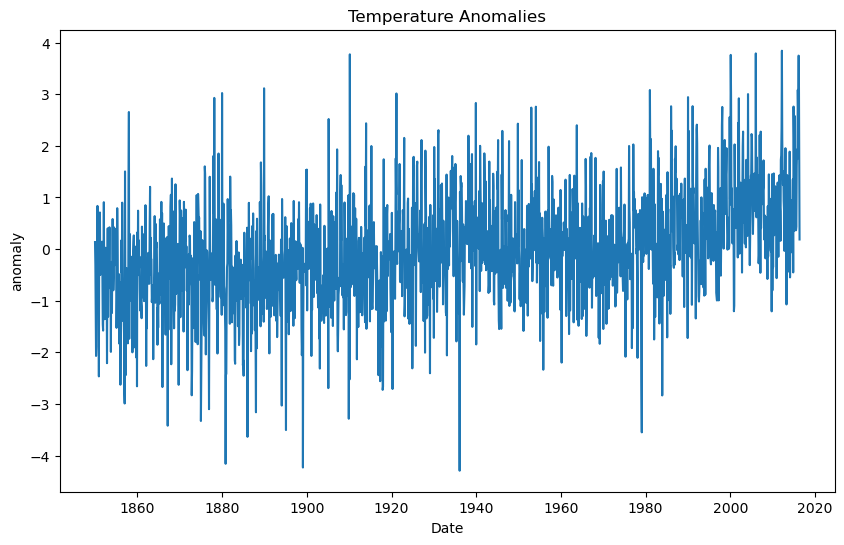

In [39]:
# plot anamolies
temp['Date'] = pd.to_datetime(temp['Date'])
temp.set_index('Date', inplace=True)
temp.sort_index(inplace=True)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='anomaly', data=temp)
plt.title('Temperature Anomalies')
plt.show()

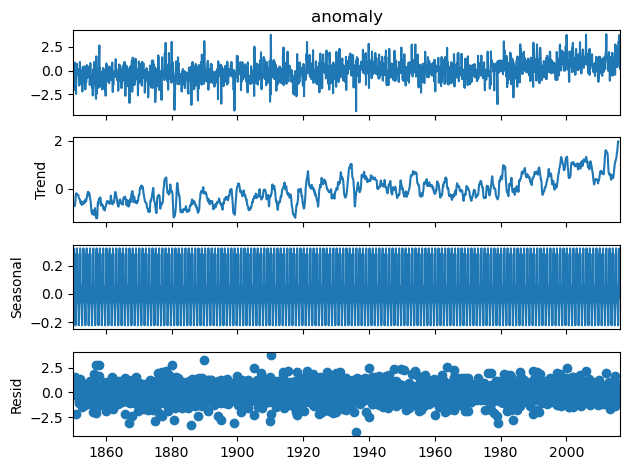

In [40]:
# seasonal decomposition for temperature
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(temp['anomaly'], model='additive', period=12)
decomposition.plot()
plt.show()

trend = decomposition.trend

In [18]:
emi_com = pd.read_csv('emission_consumption.csv')
emi_com.head()

,EIA_ID,Date,Consumption (kBarrel),Column_Order_x,Energy Type,Energy Class,Sector,Emission (Mton Co2),Column_Order_y,Emission per Consumption
0,DFRCPUS,1973-01-01,1.706943e+03,1,Distillate Fuel Oil,Petroleum,Residential,22.796,3,1.335487e-02
1,PCEIZUS,1973-01-01,6.721000e+00,11,Petroleum Coke,Petroleum,Electric Power,0.128,4,1.904479e-02
2,NGEIPUS,1973-01-01,3.988980e+07,11,Natural Gas,Natural Gas,Electric Power,12.163,2,3.049150e-07
3,DKEIZUS,1973-01-01,1.808870e+02,10,Distillate Fuel Oil,Petroleum,Electric Power,2.397,3,1.325137e-02
4,PAACPUS,1973-01-01,8.508201e+03,9,Total,Petroleum,Transportation,101.775,10,1.196199e-02


In [20]:
# inner join temp and emi_com on date
df = pd.merge(temp, emi_com, on='Date', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19253 entries, 0 to 19252
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   anomaly                   19253 non-null  float64
 1   Date                      19253 non-null  object 
 2   EIA_ID                    19253 non-null  object 
 3   Consumption (kBarrel)     19253 non-null  float64
 4   Column_Order_x            19253 non-null  int64  
 5   Energy Type               19253 non-null  object 
 6   Energy Class              19253 non-null  object 
 7   Sector                    19253 non-null  object 
 8   Emission (Mton Co2)       19253 non-null  float64
 9   Column_Order_y            19253 non-null  int64  
 10  Emission per Consumption  18716 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.8+ MB


Text(0.5, 1.0, 'Temperature vs Emission by Petroleum in January')

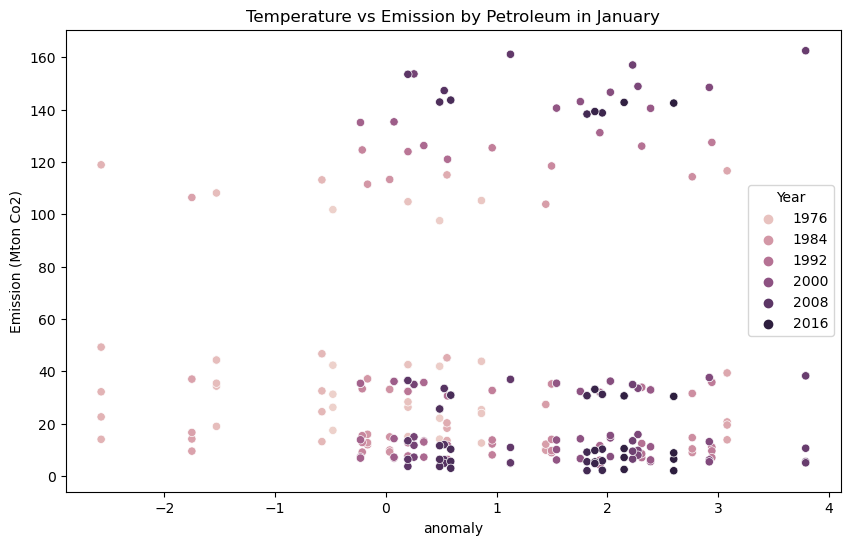

In [28]:
# plot temperature vs emission by petroleum in january

petroleum = df[df['Energy Class'] == 'Petroleum']
petroleum = petroleum[petroleum['Energy Type'] == 'Total']
petroleum['Month'] = pd.DatetimeIndex(petroleum['Date']).month_name()
petroleum = petroleum[petroleum['Month'] == 'January']
petroleum['Year'] = pd.DatetimeIndex(petroleum['Date']).year

plt.figure(figsize=(10, 6))
sns.scatterplot(x='anomaly', y='Emission (Mton Co2)', data=petroleum, hue='Year')
plt.title('Temperature vs Emission by Petroleum in January')

In [25]:
import sys
sys.path.append('..')
from LinearModel import *

In [29]:
X = petroleum['Emission (Mton Co2)']
y = petroleum['anomaly']
test_linear_model(X, y)

The p-value for the F-test is: 0.7011121205884043.
The model is not statistically significant.
